# Here we make a Random Forest Model For Prochlorococcus


In [48]:
# Running model preperation notebook that has a function we need to call
%run /Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/python/04_Populations-model-fitting/01_model-preparation.ipynb


In [49]:
#loading packages for random forest modeling

from sklearn.model_selection import train_test_split
import joblib

## RF Regressor for Prochlorococcus

In [50]:
# creating a df, labels and features with only for the observed Prochlorooccus
population_name = 'Prochlorococcus'

pop_df, labels, features, feature_list = preprocess_single_population(covari, population_name)

In [51]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets"
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.75, random_state = 42)

In [52]:
# Looking at the shape of the features and labels to see if they match up
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (584, 21)
Training Labels Shape: (584,)
Testing Features Shape: (1754, 21)
Testing Labels Shape: (1754,)


In [53]:
train_labels

array([ 0.160842  ,  6.04566086,  4.71254665,  2.6722527 ,  5.41248736,
        5.39141529,  2.70811755,  4.371827  ,  3.79658834,  3.1498299 ,
        7.40829738, 10.9701872 ,  6.56180089,  4.26461627,  0.06947806,
        8.93926899,  5.79971212,  0.0735284 ,  8.27462895,  3.87554401,
        6.38653821,  7.45817096,  2.47731949,  2.86649806,  8.75194649,
        4.54525286,  0.0961954 ,  3.12495074,  5.9770983 ,  7.23462089,
        8.08287136,  0.21462238,  7.39032562,  9.29123415,  6.61055449,
        7.82298401,  2.50149662,  5.79334036,  6.542853  ,  7.31634321,
        7.39253129,  6.02857773,  0.09194053,  7.57170367,  6.85773144,
        1.28134955,  0.20680319,  0.07169406,  8.02839233,  4.51803769,
       11.93501678,  3.58190406,  9.33095223,  7.15398777,  4.00373106,
        7.6159466 ,  3.40633175,  6.72484615,  5.38937783,  9.98941459,
        7.75140437,  4.24400049,  2.36520318,  7.29748047,  8.31107635,
       12.02406772,  5.36457336,  6.02597458,  7.01929798, 10.64

In [54]:
# We are using a regressor RF model because we are predicting on continous values
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Use the Training data to build the model
rf.fit(train_features, train_labels)
#saving the model
joblib.dump(rf, "/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/pro_random_forest.joblib")


['/Users/cristianswift/Desktop/armbrust-lab/Seaflow-Machine-Learning/RF_models/pro_random_forest.joblib']

### Predicting and Testing for Prochlorococus

In [55]:
# Convert test_features to a DataFrame
test_features_df = pd.DataFrame(test_features, columns=feature_list)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Create a new Series with predicted values and index from test_features_df
predic_biomass = pd.Series(predictions, index=test_features_df.index)

# Assign the new Series to the DataFrame as a new column
pop_df['Prediction'] = predic_biomass

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 1.21 pgC per L.
Accuracy: 45.12 %.


/var/folders/w6/gkpzzsjx0n101092kzm2dnh00000gn/T/ipykernel_5382/1849695089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df['Prediction'] = predic_biomass


In [56]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [57]:
pd.DataFrame(rf.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

,0
PO4,0.303240
salin,0.127306
temp,0.102805
POC,0.066814
O2,0.053735
NH4,0.050449
ALK,0.048548
SiO2,0.034098
DIC,0.031569
NO3,0.026024


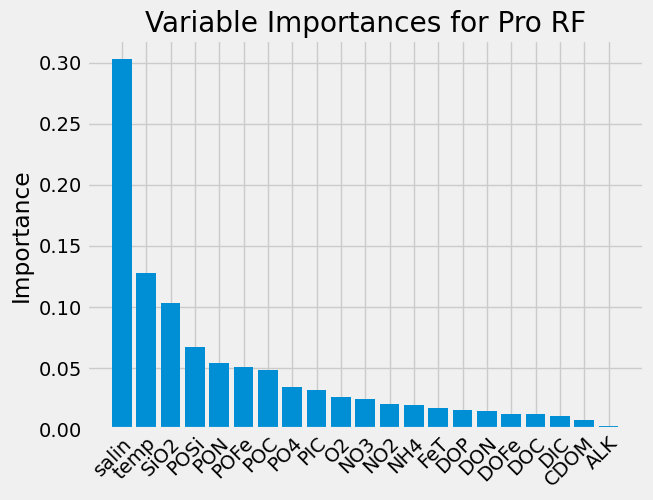

In [58]:
feature_importance = pd.DataFrame(rf.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=feature_importance.index,height=feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Pro RF');

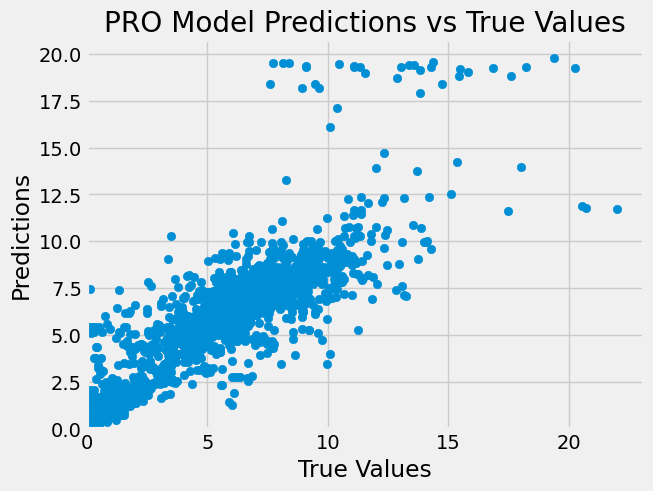

In [59]:
fig, ax = plt.subplots()
ax.scatter(test_labels, predictions)
ax.set_title('PRO Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)

ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')

plt.show()

# run the model on each individual populaton - see which does best
#put zero values when 